# The VM and more python skills


## The _physma_ virtual machine (VM)

So far we have used the online platform [Wendi](http://wendi.phys.uvic.ca) for this class. An alterntative approach is the virtual machine, a _workshop_ where we can go and find or install all the things we need to do our math and physics related tasks. We want to have all the same system so that we are not bogged down too much by technical problems. We are going to create a virtual machine for that purpose. There are many virtualization technologies out there, and in fact Wendi, for example, uses [Docker](https://www.docker.com) virtualization. 

Here we will use the freely available [VirtualBox](https://www.virtualbox.org) software. A virtualization software provides a virtual computer into which we can install a variety of different operating systems, such as various flavours of Linux. Linux is a unix-like operating system (OS) and serves well as a teaching platform. You have already met a Linux environment in the Wendi terminal. All the tools that we will need are available as open source or feely downloadable. At the end of this course your personal version of the **physma** virtual machine will be useful tool that allows you to perform many tasks during your further undergraduate education, and beyond!

### Create your own virtual machine

1. Download and install the [virtual box](https://www.virtualbox.org) software.
2. Download a suitable linux distribution. A linux distribution or distro is the Linux kernel (the core of the operating system) packed together with any selection of application programs, such as the desktop environment, terminal programs, editors etc. We want something light with a simple user interface which does not distract us from the task at hand; a good solution is [Lubuntu](<http://lubuntu.net>) - a lightweight member of the Ubuntu family of Linux distributions.
3. Download the 64-bit `/iso` image from the [lubuntu download page](https://help.ubuntu.com/community/Lubuntu/GetLubuntu). An `.iso` image is a format of a big chunk of data that one used to write to CD. Now it serves as a container that can be used to package up larger amounts of data and move it from one place to another. These images can be mounted into the filesystem of the operating system and appear as if they are a separate hard disk. Other operating systems know other image file formats, such as `.dmg` on Mac OS.
4. Start building a new guest OS (Start with the new button and follow the pre-defined build path suggested by the succession of GUIs, and adopt the defaults; at some point you have to select the downloaded `.iso` image file as the installation source).  
5. Possible **pitfalls**: 
    * make sure you select _Linux_ and _64-bit Ubuntu_ system early on when you create the Guest OS
    * increase the size of your hard drive to 20GB if possible, otherwise you have to add a virtual disk later 
6. You may want to use the software installation tool to uninstall things to make your system lean and small. In the next section we cover how to install into your virtual machine the special software packages we will need.

### Configuration and maintenance of the _physma_ VM
#### Virtual box additions
To make the VM work nicely, e.g. adaptive screen resolution install the VBox additions. Start with installing some kernel extensions:
```
sudo apt-get install dkms
```
Then **reboot** and then attach the virtual optical drive in the VM _Devices_ menue. Then do
```
sudo sh /media/users/VBOXADDITIONS_xxxxxx/VBoxLinuxAdditions.run
```
Replace `xxxxxxx` with the actual version number! Do `ls /media/users/VBOXADDI*`. `users` in the pathname may be your user name. 
At this point you should shut-down the VM.

If you have problems consult [the official _Guest Additions_ documentation.](https://www.virtualbox.org/manual/ch04.html). 

_Check if it works:_ If you resize the VM window and the desktop resizes with it then it works. 


### Installing software packages

#### Linux OS software
There are several graphical user interfaces (GUIs) for managing software packages. Often a quicker path to success involves the command line interface (CLI) tool `apt`. As with most Unix/Linux command line tools you can use the `man` command to view the manual page.

**Updating the system***

Make sure you select the upgrade/update option during installation and/or start with
```
sudo apt-get update
sudo apt-get upgrade
sudo apt-get autoclean
sudo apt-get autoremove
```

For example, install your favorite editors:
```
sudo apt-get install emacs nano vim
```

As we move along we will install more things that we may need, such as:
* the Latex typesetting package 
* a fortran or C compiler
* additionl image or movie processessing software

In any case search for the requested program, e.g.:
```
apt-cache search latex
```
and then install it. The latter you may have to do as _root_ user (superuser) using the `sudo` command prefix. In this way the new program will be available to all users with accounts on your _physma_ VM (this relates to the multi-user nature of the Linux OS, even if we do not yet need this feature now).

**Example 1:**

We will need the `git` command line program:

```
apt search git
sudo apt install git
```

** Example 2:**
We may need at some point some image manipulation software, e.g. to convert one image format into another:
```
apt search "image manipulation programs"
```
This returns some list, and you may then decide to install one of them:
```
sudo apt-get install imagemagick
```

The first command gives a list of all packages containing, using, being related to or providing the software. The second command installs the packages and all required dependencies. Actually installing a package must be done as super-user, or as we do this here, with the little utility `sudo` which allows users (in this case the user past) to do certain things as _su_-peruser. Again, use the `user` password.


**Note:**  Make sure your _physma_ VM has internet access! For this your host OS needs internet access.

#### Mounting a directory from your host system
This is extremely useful for a number of reasons:
* enlarge the available disk space dynamically without having to dedicate host disk space to the guest OS 
* share files with your host system where they would be available for further processing, editing, emailing etc

Here is how it works:
1. shut-down your VM
2. open settings in VirtualBox software
3. select the _Shared Folders_ tab and add a folder for sharing, select _auto-mount_: ![it should look like this](../images/share_folder_1.jpg)
Here `tmp` is the device name that you will use for the mount command, while the path name is the location of the existing directory on your host system.
4. boot the VM
5. create in your home directory a file which will be the mount point for your shared folder, and then execute the mount command: 
```
mkdir mnt
sudo mount -t vboxsf -o uid=1000,gid=1000 tmp /home/user/mnt
```
and make sure `/home/user/mnt` is the name of the dir you have created for your mount point.
6. use `df -h` to check your newly mounted volume, use `cd` to go to the mounted dir and check that you can read and write files
7. you can identify a folder in your home directory that uses a lot of space and move it to the newly mounted volume. If you want to make a symbolic link from the moved dir to your home dir you can use the `ln -s` command, use `man` to check it out, it works like the `cp` command

#### More things to install and configure
The [NuGridDoc virtual machine](https://github.com/NuGrid/NuGridDoc/blob/master/Resources/virtual_machine.md) page provides examples for a number of configurations and package installations for a virtual machine that you may find useful. Specifically look at:
* git and repos
* python (and more details on python [here](https://github.com/NuGrid/NuGridDoc/blob/master/Resources/Python.md)



## Python data input/output

### reading data from a text file
There are a number of ways how to read a text file. 

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
# show file
!ls ../data/iniab1.4E-02As09.ppn
# show content of file
!cat ../data/iniab1.4E-02As09.ppn

../data/iniab1.4E-02As09.ppn
  1 h   1         7.1538567255E-01
  2 he  4         2.7025513111E-01
  6 c  12         2.4825306734E-03
  6 c  13         3.0083012115E-05
  7 n  14         7.3396723494E-04
  7 n  15         1.8049744286E-06 

In [3]:
# open file and attach to file object variable
#f.close()
f=open('../data/iniab1.4E-02As09.ppn')

In [4]:
# what is in f
f.readlines()

['  1 h   1         7.1538567255E-01\n',
 '  2 he  4         2.7025513111E-01\n',
 '  6 c  12         2.4825306734E-03\n',
 '  6 c  13         3.0083012115E-05\n',
 '  7 n  14         7.3396723494E-04\n',
 '  7 n  15         1.8049744286E-06 ']

In [5]:
# read data and save it into variables
ind=[];elem=[];A=[];X=[]
i=0
for line in f.readlines():
    a,b,c,d=line.split()
    i += 1         # the first column in the file contains the charge 
    ind.append(i)  # number; we don't need it, but an index variable 
    elem.append(b) # would be useful
    A.append(c)
    X.append(d)

In [6]:
# read ini abund tester
for i in range(len(ind)):
    print (ind[i],elem[i],A[i],X[i])


## Python packages and modules

As you start adding functions to your own library it may be useful to learn how to organize your own module a bit more conveniently. An easy way to do this is to create a directory, e.g. `pylib` in your home directory. In that directory create an empty file with the name `__init__.py`. Then add into that directory files with names ending in `.py`. Each of these files is a loadable module in your `pylib` package. You can load the package by adding the path in which the package directory is located (e.g. `/home/user/pylib`) to the python path. In a workstation or virtual machine this can be done by adding the line 
```
export PYTHONPATH="/home/user/pylib"
```
to your `.bashrc` file (and start a new terminal). Alternatively this can be done from the ipython notebook with the command
```
In [3]: import sys
In [4]: sys.path.append('/home/user/pylib')
```
which has the disadvantage that it has to be done each time again.

**Private methods:**
By convention python adopts a single leading underscore for private objects in a module and a double leading underscore for private objects in a class.

**Example:**
Create a simple linear interpolation function, place it into a file in a package directory and show how to import it.

In [13]:
# add path of pylab package to system PATH variable
import sys
sys.path.append('/home/user/notebooks/PHYSMATH248/math-phys.248-2017/pylab')

In [14]:
# write and import basics package
import basics as bb

In [17]:
# application
bb.lin_interp(1.5, 1.,3.,0.2,9)

2.4000000000000004

## Units and constants

## Units

Physics is about numbers with units. We have seen the power of the priniciple of dimensional homogeneity when we derived an expression for the drag coefficient. We can draw units into our python work using - of coruse - appropriate packages. One of them can be found in the `astropy` package. You will be able to install it using the usual procedure in your phast machine. Have a look at these places for documentation:

* [Units and Quantities](http://docs.astropy.org/en/latest/units/index.html)
* [Quantity](http://docs.astropy.org/en/latest/units/quantity.html)

Here is an example:
* calculate how long a $50\mathrm{W}$ light bulb could shine with the energy that is consumed by destruction when a car going at $120\mathrm{km/h}$ hits a rigid wall.
* before solving this problem make a guess! you may be surprised

Here we use the [astropy]() package.

In [18]:
# import astropy unitis package and define variables
import astropy.units as u
m = 1300000 * u.g
v = 120 *u.km/u.hr
E = 0.5*m*v**2
P = 50 * u.watt

In [19]:
# print energy in different units
print (E.to('erg'))
print (E)
print (E.si)
u.erg.find_equivalent_units()

7222222222222.222 erg
9360000000.0 g km2 / h2
722222.2222222222 s W


  Primary name | Unit definition        | Aliases     
[
  J            | kg m2 / s2             | Joule, joule ,
  Ry           | 2.17987e-18 kg m2 / s2 | rydberg      ,
  eV           | 1.60218e-19 kg m2 / s2 | electronvolt ,
  erg          | 1e-07 kg m2 / s2       |              ,
]

In [20]:
# calculate time
t = E / P
print (t.si)
print (t.to('h'))

14444.444444444443 s
4.012345679012346 h


**Constants:** `astropy` also provides constants:

In [21]:
from astropy import constants as const
const.L_sun  # luminosity of sun
const.G  # graviational constant
const.au # the astronomical unit, 1 AU = distance from sun to earth

<Constant name='Astronomical Unit' value=149597870700.0 uncertainty=0.0 unit='m' reference='IAU 2012 Resolution B2'>

## Basic plotting with python II
Some plotting examples and how they working in ipython notebooks. 

### Example 2: a 2D plot
We want to plot
$$ z(x,y) = \sin(x)\cos(x) $$

In [22]:
# experiment with x being a vector -> sin(x) vector
n = 4
x=linspace(-4.,4.,n)
sin(x)

array([ 0.7568025, -0.9719379,  0.9719379, -0.7568025])

In [23]:
# can x be matrix?
xy=array([[1,2],[0,1]])
tan(xy)

array([[ 1.55740772, -2.18503986],
       [ 0.        ,  1.55740772]])

* how to build a 2D array out of x and y vectors that represent the x and y axis? [numpy.meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html)

In [24]:
n = 50
x=linspace(-3.,5.,n)
y=linspace(-4.,4.,n)
#x

In [25]:
y

array([-4.        , -3.83673469, -3.67346939, -3.51020408, -3.34693878,
       -3.18367347, -3.02040816, -2.85714286, -2.69387755, -2.53061224,
       -2.36734694, -2.20408163, -2.04081633, -1.87755102, -1.71428571,
       -1.55102041, -1.3877551 , -1.2244898 , -1.06122449, -0.89795918,
       -0.73469388, -0.57142857, -0.40816327, -0.24489796, -0.08163265,
        0.08163265,  0.24489796,  0.40816327,  0.57142857,  0.73469388,
        0.89795918,  1.06122449,  1.2244898 ,  1.3877551 ,  1.55102041,
        1.71428571,  1.87755102,  2.04081633,  2.20408163,  2.36734694,
        2.53061224,  2.69387755,  2.85714286,  3.02040816,  3.18367347,
        3.34693878,  3.51020408,  3.67346939,  3.83673469,  4.        ])

In [26]:
xv,yv = meshgrid(x,y)
#yv

In [27]:
z=sin(xv)*cos(yv)
#z

<IPython.core.display.Javascript object>


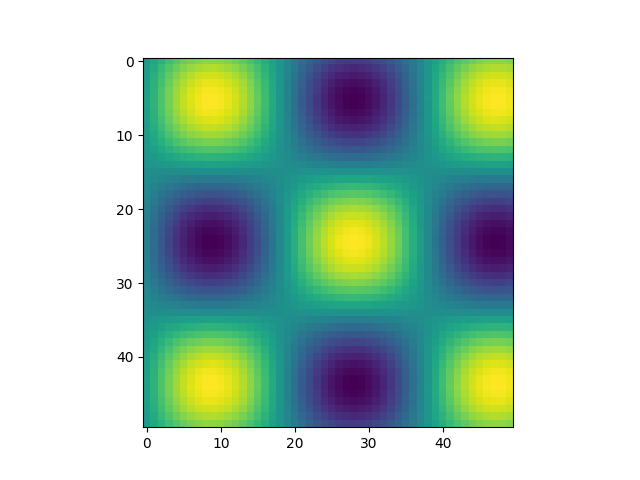

In [28]:
ifig = 2; close(ifig); figure(ifig)
imshow(z)

`imshow` allows for a variety of interpolations, see [images example](http://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html):

<IPython.core.display.Javascript object>


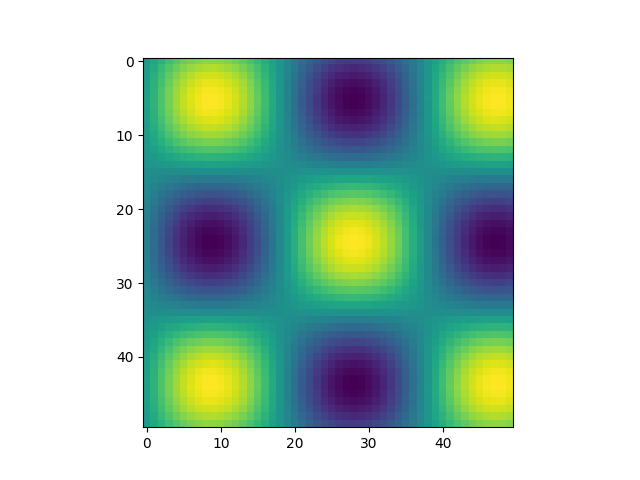

In [29]:
ifig = 3; close(ifig); figure(ifig)
imshow(z,interpolation='none')

There are lots of interesting examples in the [matplotlib gallery](http://matplotlib.org/gallery.html). It is recommended to try some of these out.